LAB 5: Wide and Deep Network Architectures

Jocelyn Rupp and Julia Rushton 

# Dataset Selection

Select a dataset similarly to lab one. That is, the dataset must be table data and must have categorical features. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression. You are NOT allowed to use the census (i.e., Adult) dataset that was given as an example in class. 

# Preparation

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data_path = 'collision-data.csv'
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,Motor Vehicle Accident,36.0,9.4,0.0,NaN,NaN,33.0,38,27,17.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0


In [4]:
df["SEVERITYCODE"].value_counts()

0    71979
1    37804
2     1909
3      190
Name: SEVERITYCODE, dtype: int64

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.

In [5]:
#
# Remove attributes that arent useful for us
df.drop(['WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'JUNCTIONTYPE', 'response_time'], axis = 1, inplace = True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  INATTENTIONIND        111882 non-null  bool   
 13  UNDERINFL             111882 non-null  bool   
 14  WEATHER               111882 non-null  object 
 15  

In [6]:
# preprocessing of numeric variables

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check the columns in the dataset
print(df.columns)

# Define unnecessary columns to drop
unnecessary_columns = ['Unnamed: 0', 'SPDCASENO', 'DATE', 'TIME']
df.drop(unnecessary_columns, axis=1, errors='ignore', inplace=True)

bool_cols = ["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR", "intersection_related", "LIGHTCOND"]
df[bool_cols] = df[bool_cols].astype(str)

# Determine variable types and describe the final dataset
variable_types = {}
numeric_cols = ['longitude', 'latitude', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
                'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'AWND', 'PRCP', 'TAVG']
for col in df.columns:
    if col in numeric_cols:
        variable_types[col] = 'Numeric'
    else:
        variable_types[col] = 'Categorical'

final_dataset_description = df.describe()

print("Variable Types:")
for col, v_type in variable_types.items():
    print(f"{col}: {v_type}")

print("\nFinal Dataset Description:")
print(final_dataset_description)

Index(['Unnamed: 0', 'longitude', 'latitude', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR',
       'SPDCASENO', 'DATE', 'TIME', 'intersection_related', 'AWND', 'PRCP',
       'TAVG'],
      dtype='object')
Variable Types:
longitude: Numeric
latitude: Numeric
SEVERITYCODE: Categorical
COLLISIONTYPE: Categorical
PERSONCOUNT: Numeric
PEDCOUNT: Numeric
PEDCYLCOUNT: Numeric
VEHCOUNT: Numeric
INJURIES: Numeric
SERIOUSINJURIES: Numeric
FATALITIES: Numeric
INATTENTIONIND: Categorical
UNDERINFL: Categorical
WEATHER: Categorical
ROADCOND: Categorical
LIGHTCOND: Categorical
SPEEDING: Categorical
HITPARKEDCAR: Categorical
intersection_related: Categorical
AWND: Numeric
PRCP: Numeric
TAVG: Numeric

Final Dataset Description:
           longitude       latitude   SEVERITYCODE    PERSONCOUNT  \
count  

Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 

Group 1: Severity Code and Collision Type
Group 2: Weather, Road, and Light Condition, Severity Code
Group 3: Speeding, Collision Type, Underthe influence

EXPLAIN WHY 

Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

recall because we want to mitigate false positives, would be really bad if an injury was not coded a 3 and it was

macro recall of each class

Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 

data set is sufficiently large and do not need to use cross validatoin for porving 

use a basic 80 20 split for testing

In [7]:
from sklearn.model_selection import train_test_split
import plotly


# X = df.drop('SEVERITYCODE', axis=1)  # Features
# y = df['SEVERITYCODE'].to_numpy()  # Target variable

## ask about plotting recall with multiclass
#y = (y > 1).astype(int) 

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Modeling

In [22]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import tensorflow.keras as keras

batch_size = 64

def create_dataset_from_dataframe(df_input, outcome):

    df = df_input.copy()
    labels = keras.utils.to_categorical(df[outcome])

    df = {key: value.values[:,np.newaxis] for key, value in df_input[[col for col in df.columns if col != outcome]].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

ds_train = create_dataset_from_dataframe(df_train, "SEVERITYCODE")
ds_test = create_dataset_from_dataframe(df_test, "SEVERITYCODE")

 Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. 
Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [24]:
from tensorflow.keras.utils import FeatureSpace

# Example One: Just lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        ##CHANGE
        "COLLISIONTYPE": FeatureSpace.string_categorical(num_oov_indices=0),
        "INATTENTIONIND": FeatureSpace.string_categorical(num_oov_indices=0),
        "UNDERINFL": FeatureSpace.string_categorical(num_oov_indices=0),
        "WEATHER": FeatureSpace.string_categorical(num_oov_indices=0),
        "ROADCOND": FeatureSpace.string_categorical(num_oov_indices=0),
        "LIGHTCOND": FeatureSpace.string_categorical(num_oov_indices=0),
        "HITPARKEDCAR": FeatureSpace.string_categorical(num_oov_indices=0),
        "SPEEDING": FeatureSpace.string_categorical(num_oov_indices=0),
        "intersection_related": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numeric features
        "longitude": FeatureSpace.float_normalized(),
        "latitude": FeatureSpace.float_normalized(),
        "PERSONCOUNT": FeatureSpace.float_normalized(),
        "PEDCOUNT": FeatureSpace.float_normalized(),
        "PEDCYLCOUNT": FeatureSpace.float_normalized(),
        "VEHCOUNT": FeatureSpace.float_normalized(),
        "INJURIES": FeatureSpace.float_normalized(),
        "SERIOUSINJURIES": FeatureSpace.float_normalized(),
        "FATALITIES": FeatureSpace.float_normalized(),
        "AWND": FeatureSpace.float_normalized(),
        "PRCP": FeatureSpace.float_normalized(),
        "TAVG": FeatureSpace.float_normalized()        
    },
    
    # Specify feature cross with a custom crossing dim
    # Severity Code and Collision Type
    #  Group 2: Weather, Road, and Light Condition, Severity Code
    # Group 3: Speeding, Collision Type, Underthe influence
    # NROADCOND', 'LIGHTCOND', 'SPEEDING'
    crosses=[
        FeatureSpace.cross(
            feature_names=('INATTENTIONIND','COLLISIONTYPE'),  
            crossing_dim=2*9),
        FeatureSpace.cross(
            feature_names=('WEATHER', 'ROADCOND'), 
            crossing_dim=8*7),
        FeatureSpace.cross(
            feature_names=('SPEEDING','UNDERINFL'),
            crossing_dim=2*2),
    ],
    output_mode="concat", # can also be a dict, processed internally
)


In [25]:
# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space.adapt(train_ds_with_no_labels)

In [26]:
from tensorflow.keras.layers import Embedding, Flatten

def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 
        
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.

In [27]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

numeric_headers = list(filter(lambda x: variable_types[x] == "Numeric", variable_types.keys()))
categorical_headers = list(filter(lambda x: variable_types[x] == "Categorical" and x != "SEVERITYCODE", variable_types.keys()))

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,564 (13.97 KB)

 Trainable params: 3,528 (13.78 KB)

 Non-trainable params: 36 (192.00 B)

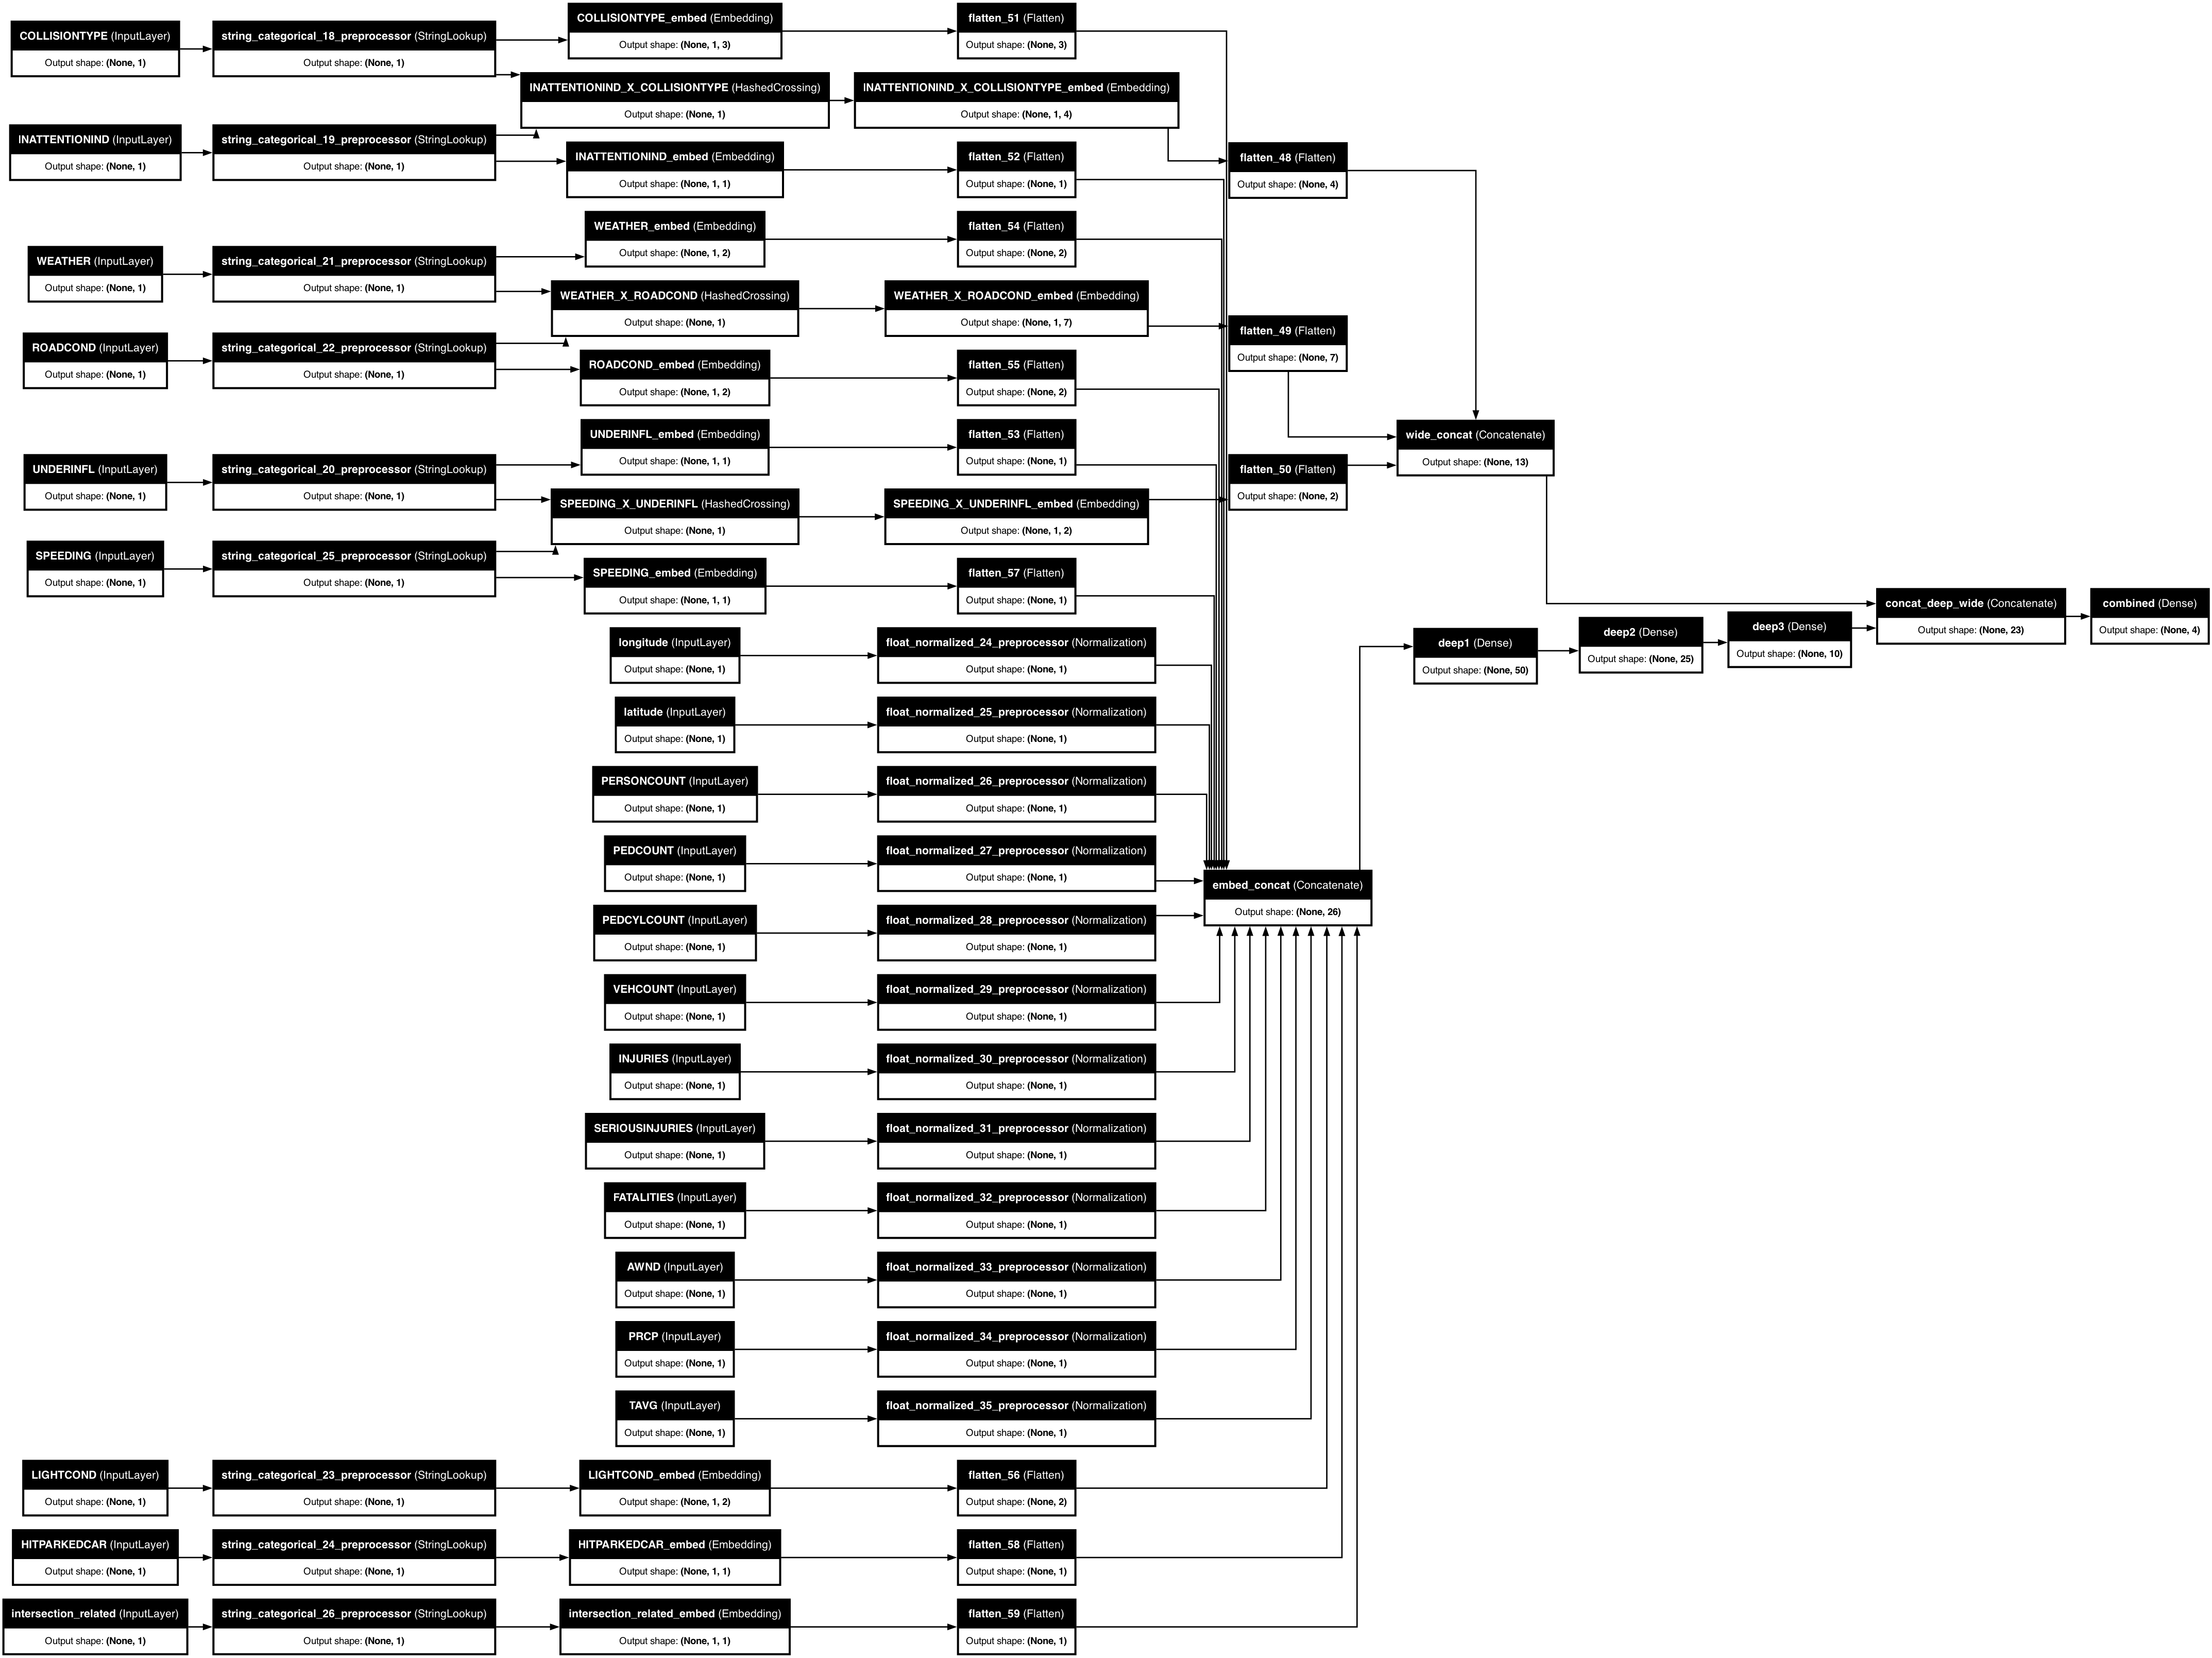

In [32]:
dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    # x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=4,activation='softmax',
                     name='combined')(final_branch)

training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model.summary()

plot_model(
    training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [33]:
# saving each loss function at each epoch
history = training_model.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9395 - loss: 0.1928 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.2516e-04 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 3.0220e-05 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 6.8128e-06 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 2.6939e-06 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.1657e-06 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 5.1375e-07 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 

In [35]:
history

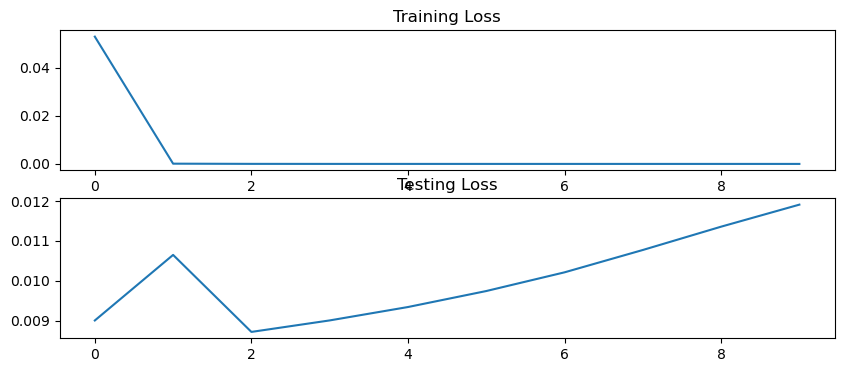

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.plot(history.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [38]:
pred = training_model.predict(ds_test)
yhat = np.argmax(pred, axis = 1)
yhat

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1, 0, 1, ..., 0, 1, 1])

In [41]:
pd.Series.value_counts(yhat)

0    14470
1     7465
2      403
3       39
dtype: int64

In [42]:
pd.Series.value_counts(df_test["SEVERITYCODE"])

0    14470
1     7465
2      402
3       40
Name: SEVERITYCODE, dtype: int64

In [40]:
import sklearn.metrics as mt

print(mt.classification_report(df_test["SEVERITYCODE"], yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14470
           1       1.00      1.00      1.00      7465
           2       1.00      1.00      1.00       402
           3       1.00      0.97      0.99        40

    accuracy                           1.00     22377
   macro avg       1.00      0.99      1.00     22377
weighted avg       1.00      1.00      1.00     22377



In [43]:
mt.recall_score(df_test["SEVERITYCODE"], yhat, average = "macro")

0.99375

Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  

# Exceptional Work

5000 students: You have free reign to provide additional analyses.
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.
